In [5]:
from Dataset import build_dataset
from Diffusion import DiffusionModel
import matplotlib.pyplot as plt

In [2]:
n_rows = 64*2  # Total number of rows in the dataset
n_samples_per_row = 400  # Samples per row (from GMM)
means = [0, 5, -5]  # Means of the Gaussian components
variances = [1, 0.5, 0.78]  # Variances of the components
weights = [0.4, 0.4, 0.2]  # Mixing coefficients (must sum to 1)

# Generate the dataset
dataset, mean, var  = build_dataset(n_rows, n_samples_per_row, means, variances, weights, 32)

In [3]:
model = DiffusionModel(42, 32, (6,4,2), 400, 1e-5, False, 2, 10,  0.00001, 0.02, 32)
model.training(dataset)
l = model.sampling_DDPM()


  0%|          | 0/4 [00:00<?, ?it/s]

Loss at epoch  0  is  1.6486948


  0%|          | 0/4 [00:00<?, ?it/s]

Loss at epoch  1  is  1.629679


0it [00:00, ?it/s]

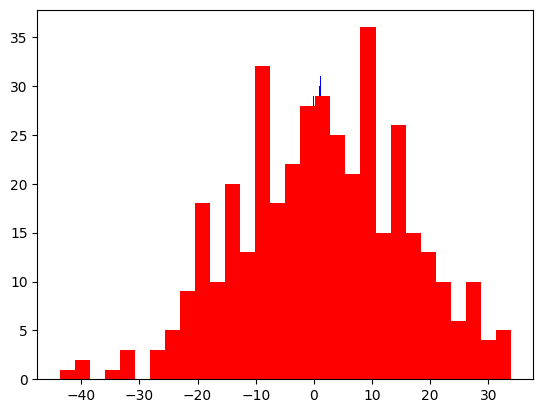

In [25]:
plt.hist(next(iter(dataset))[0], bins=30,color='blue')
plt.hist(l[-1].squeeze(), bins=30, color='red')
plt.show()